# The  aim of this notebook is to predict which of the customers will have their loan approved.

In [4]:
import os
os.chdir('D:\project\loan-dataset')
os.getcwd()

'D:\\project\\loan-dataset'

In [2]:
#importing library
import   pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#getting datasets
data_train= pd.read_csv('loan-dataset-train.csv')
data_test=pd.read_csv('loan-dataset-test.csv')

In [8]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#Checking for missing values
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#filling missing credit values with median
data_train['Credit_History']=data_train['Credit_History'].fillna(data_train['Credit_History'].median())

In [15]:
df=data_train.copy()

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            523 non-null    object 
 1   Gender             523 non-null    object 
 2   Married            523 non-null    object 
 3   Dependents         523 non-null    object 
 4   Education          523 non-null    object 
 5   Self_Employed      523 non-null    object 
 6   ApplicantIncome    523 non-null    int64  
 7   CoapplicantIncome  523 non-null    float64
 8   LoanAmount         523 non-null    float64
 9   Loan_Amount_Term   523 non-null    float64
 10  Credit_History     523 non-null    float64
 11  Property_Area      523 non-null    object 
 12  Loan_Status        523 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 57.2+ KB


In [19]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

In [20]:
#finding correlation
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.101450,0.515906,-0.000025,-0.057972,-0.043445
CoapplicantIncome,-0.101450,1.000000,0.192040,-0.008410,-0.004826,-0.046825
LoanAmount,0.515906,0.192040,1.000000,0.076697,-0.033974,-0.061889
Loan_Amount_Term,-0.000025,-0.008410,0.076697,1.000000,0.030693,-0.016902
Credit_History,-0.057972,-0.004826,-0.033974,0.030693,1.000000,0.517013
Loan_Status,-0.043445,-0.046825,-0.061889,-0.016902,0.517013,1.000000


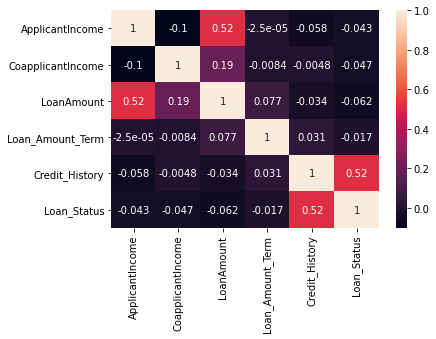

In [21]:
#plotting correlation
sns.heatmap(df.corr(),annot=True)

# Data Cleaning

In [22]:
columns_to_remove=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_ID']
df.drop(axis=1, labels= columns_to_remove,  inplace=True)

In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,1.0,Urban,1


In [24]:
df.replace(to_replace ='3+', value='3',inplace=True)

In [25]:
df.shape

(523, 8)

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [28]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [30]:
df=pd.get_dummies(df)

In [32]:
df.head(10)

,Dependents,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,1,1.0,0,0,0,1,0,1,1,0,1,0
2,0,1.0,2,1,0,1,0,1,1,0,0,1
3,0,1.0,2,1,0,1,0,1,0,1,1,0
4,0,1.0,2,1,0,1,1,0,1,0,1,0
5,2,1.0,2,1,0,1,0,1,1,0,0,1
6,0,1.0,2,1,0,1,0,1,0,1,1,0
7,3,0.0,1,0,0,1,0,1,1,0,1,0
8,2,1.0,2,1,0,1,0,1,1,0,1,0
9,1,1.0,1,0,0,1,0,1,1,0,1,0
10,2,1.0,2,1,0,1,0,1,1,0,1,0


In [33]:
df.corr()

,Dependents,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
Dependents,1.000000,-0.029628,-0.002916,0.023213,-0.218128,0.218128,-0.373178,0.373178,-0.058805,0.058805,-0.053819,0.053819
Credit_History,-0.029628,1.000000,-0.002838,0.517013,-0.016697,0.016697,-0.032750,0.032750,0.045159,-0.045159,0.022220,-0.022220
Property_Area,-0.002916,-0.002838,1.000000,0.051365,-0.001284,0.001284,-0.026572,0.026572,0.057328,-0.057328,0.033122,-0.033122
Loan_Status,0.023213,0.517013,0.051365,1.000000,-0.036330,0.036330,-0.114309,0.114309,0.063471,-0.063471,0.030614,-0.030614
Gender_Female,-0.218128,-0.016697,-0.001284,-0.036330,1.000000,-1.000000,0.350681,-0.350681,0.062914,-0.062914,-0.011238,0.011238
Gender_Male,0.218128,0.016697,0.001284,0.036330,-1.000000,1.000000,-0.350681,0.350681,-0.062914,0.062914,0.011238,-0.011238
Married_No,-0.373178,-0.032750,-0.026572,-0.114309,0.350681,-0.350681,1.000000,-1.000000,0.010541,-0.010541,-0.012624,0.012624
Married_Yes,0.373178,0.032750,0.026572,0.114309,-0.350681,0.350681,-1.000000,1.000000,-0.010541,0.010541,0.012624,-0.012624
Education_Graduate,-0.058805,0.045159,0.057328,0.063471,0.062914,-0.062914,0.010541,-0.010541,1.000000,-1.000000,-0.001953,0.001953
Education_Not Graduate,0.058805,-0.045159,-0.057328,-0.063471,-0.062914,0.062914,-0.010541,0.010541,-1.000000,1.000000,0.001953,-0.001953


In [34]:
y=df['Loan_Status']

In [36]:
X=df.drop('Loan_Status',axis=1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [39]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [40]:
X.head()

,Dependents,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,1,1.0,0,0,1,0,1,1,0,1,0
2,0,1.0,2,0,1,0,1,1,0,0,1
3,0,1.0,2,0,1,0,1,0,1,1,0
4,0,1.0,2,0,1,1,0,1,0,1,0
5,2,1.0,2,0,1,0,1,1,0,0,1


# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)

y_predict = log_reg.predict(X_test)

In [46]:
# Summary prediction 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.91      0.36      0.51        28
           1       0.81      0.99      0.89        77

    accuracy                           0.82       105
   macro avg       0.86      0.67      0.70       105
weighted avg       0.84      0.82      0.79       105



In [47]:
# Accuracy score
from sklearn.metrics import accuracy_score

Log_red_Acc_Sc = accuracy_score(y_predict,y_test)
print('Accuracy is',Log_red_Acc_Sc)

Accuracy is 0.819047619047619


In [48]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

y_predict = dec_tree.predict(X_test)


In [50]:
 # Summary prediction 

print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.61      0.39      0.48        28
           1       0.80      0.91      0.85        77

    accuracy                           0.77       105
   macro avg       0.71      0.65      0.67       105
weighted avg       0.75      0.77      0.75       105



In [51]:
# Accuracy score
dec_tree_acc_Sc = accuracy_score(y_predict,y_test)
print('Accuracy is',dec_tree_acc_Sc)

Accuracy is 0.7714285714285715


In [52]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier()
ran_for.fit(X_train, y_train)

y_predict = ran_for.predict(X_test)


In [53]:
# Summary prediction 
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.62      0.36      0.45        28
           1       0.80      0.92      0.86        77

    accuracy                           0.77       105
   macro avg       0.71      0.64      0.65       105
weighted avg       0.75      0.77      0.75       105



In [54]:
# Accuracy score
ran_for_Acc_Sc = accuracy_score(y_predict,y_test)
print('Accuracy is',ran_for_Acc_Sc)

Accuracy is 0.7714285714285715


# Conclusion

Logistic Regression predicts with higher accuracy.